# Logistic Regression in Python - Scikit Learn

## Import Required Libraries

In [66]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

## Load Dataset

> The seaborn library has many example datasets you can work with. Use the following code to view all seaborn datasets: sb.get_dataset_names()

In [67]:
df = sb.load_dataset('iris')

In [68]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [69]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Preprocessing

### Selecting columns and handling nulls

In [70]:
# Selecting and reordering columns so the target variable is in the last column.

df = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']]

In [71]:
# Exploring the data to find any nulls

df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [72]:
# *** Not necessary for the IRIS dataset ***
# Dropping null values. Axis = 0 drops all rows with null values (Axis = 1 drops columns). Inplace = True modifies the original dataframe

df.dropna(axis = 0, inplace = True)

### Splitting the data between predictors and target

> The code below shows 2 different ways that this split can be done. If the target variable is in the last column, the 2nd option is faster in the sense that you don't have to explcitly type all column names.

In [73]:
X = [['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = ['species']

# Assuming that your target variable is in the last column, the data can be split with the following:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Train/Test Split

> Reserves a certain percentage of the data for testing your model. The test size parameter takes a value between 0 and 1.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

## Logistic Regression

> Details on the scikit learn Logistic Regression model can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [75]:
logistic_model = LogisticRegression()

### Model Fit

In [76]:
model_fit = logistic_model.fit(X_train, y_train)

### Model Predictions

In [77]:
predictions = model_fit.predict(X_test)
predictions

array(['setosa', 'versicolor', 'setosa', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'setosa'], dtype=object)

### Model Scoring

In [79]:
# Accuracy

score = model_fit.score(X_test, y_test)
score

0.98

In [48]:
# Confusion Matrix

cm = confusion_matrix(y_test, predictions, labels=["setosa", "versicolor", "virginica"])
cm

array([[15,  0,  0],
       [ 0, 20,  0],
       [ 0,  1, 14]], dtype=int64)

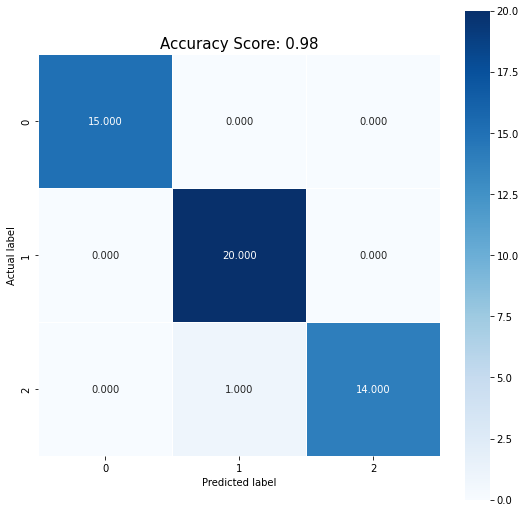

In [49]:
# Formatted Confusion Matrix

plt.figure(figsize=(9,9))
sb.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);